In [111]:
# !pip install matplotlib --upgrade
#!pip install seaborn --upgrade

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [112]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [113]:
lowongan_kerja  = pd.read_excel("Lowongan Kerja.xlsx")
pelamar_loker = pd.read_excel("List Pelamar Loker.xlsx")
user_data = pd.read_excel("Master Data.xlsx", sheet_name = 'MASTER DATA')
rekrut = pd.read_excel("List User di Rekrut.xlsx")

# Data Lowongan Kerja

## 1. Exploratory Data Analysis

In [114]:
lowongan_kerja.head()

,Timestamp,Email,Nama Perusahaan,Deskripsi Pekerjaan,Persyaratan,Logo Perusahaan (Bentuk Square),Deadline Penerimaan CV,Pengiriman CV,Nama PIC,Kontak PIC,Posisi PIC,Tentang Perusahaan,Jenis Disabilitas Yang Dicari,Posisi Dibuka,Cabang Perusahaan,Besar Gaji per bulan,status
0,2022-03-18 11:07:18.192,oki.wanarijki@gmail.com,PT Infomedia Nusantara,Agent Call Center Disabilitas Layanan Internet...,Pendidikan Min D3\nUsia Maksimal 35 Tahun\nPen...,https://drive.google.com/open?id=1RsiCwZwyp2ER...,2022-04-29,infomedia.recruit@gmail.com,Oki Wanarijki,082116979100,Recruitment & Talent Sourcing,NaN,NaN,NaN,NaN,NaN,SUDAH DIINPUT
1,2022-03-22 11:01:20.594,mazayannisa.suyuthi@unv.org,United Nations Volunteers Programme (UNV),Within the delegated authority and under the s...,Required experience\n3 years of experience in ...,https://drive.google.com/open?id=1WPxTJLL-gwOj...,2022-03-31,https://app.unv.org/opportunities/168703688414...,Mazayannisa Suyuthi,mazayannisa.suyuthi@unv.org,Volunteerism Mainstreaming Officer,The United Nations Volunteers (UNV) programme ...,semua jenis disabilitas,Communications and Campaign Officer (SDG Acade...,Jakarta,NaN,SUDAH DIINPUT
2,2022-03-22 11:34:37.221,mazayannisa.suyuthi@unv.org,United Nations Volunteers Programme (UNV),Within the delegated authority and under the s...,Required experience\n2 years of experience in ...,https://drive.google.com/open?id=1fC0Wacjo4v7D...,2022-03-24,https://app.unv.org/opportunities/168643156146...,Mazayannisa Suyuthi,mazayannisa.suyuthi@unv.org,Volunteerism Mainstreaming Officer,The United Nations Volunteers (UNV) programme ...,semua jenis disabilitas,Gender and Adolescent Development Officer,Jakarta,NaN,SUDAH DIINPUT
3,2022-03-28 12:49:20.770,mazayannisa.suyuthi@unv.org,United Nations Volunteers Programme (UNV),LAPOR is an online citizen complaints manageme...,1. National or legal resident of Indonesia\n2....,https://drive.google.com/open?id=1-HdFWnxtWoG0...,2022-03-31,1.\tCreate your profile on https://app.unv.org...,Mazayannisa (Maya) Suyuthi,mazayannisa.suyuthi@unv.org,Volunteerism Mainstreaming Officer,The United Nations Volunteers (UNV) programme ...,Semua jenis disabilitas,Communications and Campaign Officer (SDG Acade...,UNDP Indonesia (Jakarta),NaN,SUDAH DIINPUT
4,2022-03-28 12:53:51.604,mazayannisa.suyuthi@unv.org,United Nations Volunteers Programme (UNV),Within the delegated authority and under the s...,1. National or legal resident of Indonesia\n2....,https://drive.google.com/open?id=1I03RjJAJj1a0...,2022-04-05,1.\tCreate your profile on https://app.unv.org...,Mazayannisa Suyuthi,mazayannisa.suyuthi@unv.org,Volunteerism Mainstreaming Officer,The United Nations Volunteers (UNV) programme ...,Semua jenis disabilitas,Communications and Campaign Officer (Outreach ...,UNDP Indonesia (Jakarta),NaN,SUDAH DIINPUT


In [115]:
lowongan_kerja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Timestamp                        21 non-null     datetime64[ns]
 1   Email                            21 non-null     object        
 2   Nama Perusahaan                  21 non-null     object        
 3   Deskripsi Pekerjaan              21 non-null     object        
 4   Persyaratan                      21 non-null     object        
 5   Logo Perusahaan (Bentuk Square)  21 non-null     object        
 6   Deadline Penerimaan CV           21 non-null     datetime64[ns]
 7   Pengiriman CV                    21 non-null     object        
 8   Nama PIC                         21 non-null     object        
 9   Kontak PIC                       21 non-null     object        
 10  Posisi PIC                       21 non-null     object        


## Data Cleaning

In [116]:
def replace_value(lis,x,data=lowongan_kerja,colom="Posisi Dibuka"):
    for i in lis:
        data.loc[data[colom] == i,colom] = x

HelpDesk_CallCenter_list = ['Communications and Campaign Officer (SDG Academy Indonesia)','Agent Call Center','Agent Call Center (Difabel Tuna Daksa (Bagian Kaki))','Admin Helpdesk BCA','Communications and Campaign Officer (Outreach & Advocacy Officer ']
Cashier_CrewStore_list = ['CREW REGULER DAN CASHIER','Crew Store ','Telesales','Fuel Attendant (Operator SPBU)']
SocMed_IT_list = ['Social Media Officer','1. Accounting Officer\n2. Public Relation Officer (Digital Content Creator)\n3. Cashier','Staff IT','Design Graphic']
Barista_Pramuniaga_list = ['Barista sekaligus Pramusaji untuk Coffee Corner Project','PRAMUNIAGA']
HR_list = ['Internship HR dan Marketing (3 Orang total)','Recruitment Officer','Gender and Adolescent Development Officer']

replace_value(HelpDesk_CallCenter_list,"Help Desk & Agent Call")
replace_value(Cashier_CrewStore_list,"Crew Store & Cashier")
replace_value(SocMed_IT_list,"IT & Social Media")
replace_value(Barista_Pramuniaga_list,"Pramusaji Pramuniaga")
replace_value(HR_list,"HR")

In [117]:
lowongan_kerja['Posisi Dibuka'].value_counts()

Help Desk & Agent Call    7
IT & Social Media         4
Crew Store & Cashier      4
HR                        3
Pramusaji Pramuniaga      2
Name: Posisi Dibuka, dtype: int64

# Data Pelamar Loker

## 1. Exploratory Data Analysis 

In [118]:
pelamar_loker.head()

,Timestamp,Pernah Mengisi Form Difalink,Nama Lengkap,Jenis Kelamin,Umur,No. HP,Alamat Lengkap,Kabupaten/Kota,Provinsi,Jenis Disabilitas,Perusahaan Dilamar,Cabang Perusahaan,Posisi Dilamar,Ijazah PDF,CV PDF,Cabang Perusahaan.1,Posisi Dilamar.1,CV PDF.1,Ijazah PDF.1,Cabang Perusahaan.2,Posisi Dilamar.2,CV PDF.2,Cabang Perusahaan.3,Posisi Dilamar.3,CV PDF.3,Ijazah PDF.2,Unnamed: 26,Unnamed: 27,Pendidikan Terakhir,Tanggal Lahir,Pengalaman Kerja,Email,Ijazah PDF.3,CV PDF.4,Posisi Dilamar.4,Posisi Dilamar.5,Ijazah PDF.4,CV PDF.5,Portfolio PDF,CV PDF.6,Ijazah PDF.5,Posisi Magang Dilamar,CV PDF.7,Posisi Dilamar.6,Ijazah PDF.6,Sertifikat Booster,Bersedia Kerja Shifting,CV PDF.8,Ijazah PDF.7,Posisi Dilamar.7,Keterangan
0,2022-05-13 20:49:37.891,Sudah,Mochamad Kharis Suryadipura,Laki-laki,27.0,089636107480,"Perum mangkalaya rt06rw02, desa cibolang, keca...",Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Public Relation Officer,https://drive.google.com/open?id=1WsLLte9L8a0r...,https://drive.google.com/open?id=1kon3eEQ6shq1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-13 20:53:47.177,Sudah,Mochamad Kharis Suryadipura,Laki-laki,27.0,089636107480,"perum mangkalaya rt06rw02, desa cibolang, keca...",Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Accounting Officer,https://drive.google.com/open?id=1a8dNUc9QGpnA...,https://drive.google.com/open?id=11dlllFm5BIxh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-13 20:55:03.526,Sudah,Adi Prabowo,Laki-laki,24.0,085880077082,Jl.tegalan 1.B No.34 Kel.Palmeriam Kec.Matrama...,Jakarta Timur,DKI Jakarta,Disabilitas Fisik,ALFAMART,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BEKASI,Crew Store,https://drive.google.com/open?id=1XkkKVOHKNaFE...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-13 20:56:50.741,Sudah,Mochamad KharisSuryadipura,Laki-laki,27.0,089636107480,"perum mangkalaya rt06rw02, desa cibolang kecam...",Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Public Relation Officer,https://drive.google.com/open?id=1GmQtXmsKzWX1...,https://drive.google.com/open?id=1wFJy0b7rCEpW...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-14 20:21:25.843,Sudah,Nurlaila Selo Rahmawati,Perempuan,26.0,+6289635553395,"Kerjo RT.02 RW.02 Sumberejo, Kec. Kerjo. Kab....",Kab. Karanganyar,Jawa Tengah,Tuli,PT. Berdikari,Jakarta Pusat,Accounting Officer,https://drive.google.com/open?id=1CeWQmNTZuYyn...,https://drive.google.com/open?id=1THH9AXmt1KLe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
pelamar_loker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     749 non-null    datetime64[ns]
 1   Pernah Mengisi Form Difalink  750 non-null    object        
 2   Nama Lengkap                  547 non-null    object        
 3   Jenis Kelamin                 547 non-null    object        
 4   Umur                          547 non-null    float64       
 5   No. HP                        547 non-null    object        
 6   Alamat Lengkap                547 non-null    object        
 7   Kabupaten/Kota                547 non-null    object        
 8   Provinsi                      547 non-null    object        
 9   Jenis Disabilitas             547 non-null    object        
 10  Perusahaan Dilamar            547 non-null    object        
 11  Cabang Perusahaan             61

In [120]:
pelamar_loker.isna().sum()

Timestamp                         3
Pernah Mengisi Form Difalink      2
Nama Lengkap                    205
Jenis Kelamin                   205
Umur                            205
No. HP                          205
Alamat Lengkap                  205
Kabupaten/Kota                  205
Provinsi                        205
Jenis Disabilitas               205
Perusahaan Dilamar              205
Cabang Perusahaan               691
Posisi Dilamar                  691
Ijazah PDF                      691
CV PDF                          691
Cabang Perusahaan.1             714
Posisi Dilamar.1                714
CV PDF.1                        714
Ijazah PDF.1                    714
Cabang Perusahaan.2             535
Posisi Dilamar.2                535
CV PDF.2                        535
Cabang Perusahaan.3             728
Posisi Dilamar.3                728
CV PDF.3                        721
Ijazah PDF.2                    725
Unnamed: 26                     752
Unnamed: 27                 

## Data Cleaning

In [125]:
columns_to_drop = pelamar_loker.columns[0] 
pelamar_loker.drop(columns=columns_to_drop, inplace=True)
columns_to_drop = pelamar_loker.columns[12:] 
pelamar_loker.drop(columns=columns_to_drop, inplace=True)

Kolom timestamp dibuang soalnya soalnya gadipake, kolom 12 sampe abis diapus soalnya kebanyakan nilai null

In [126]:
for col in pelamar_loker.columns:
    print(col)

Nama Lengkap
Jenis Kelamin
Umur
No. HP
Alamat Lengkap
Kabupaten/Kota
Provinsi
Jenis Disabilitas
Perusahaan Dilamar
Cabang Perusahaan
Posisi Dilamar


In [124]:
pelamar_loker.describe().T

,count,mean,std,min,25%,50%,75%,max
Umur,547.0,30.729433,85.506249,18.0,22.0,26.0,29.0,2001.0


### Clean jenis disabilitas

Menyeragamkan jenis disabilitas menjadi 5 kelompok yaitu

*   Tuli
*   Tunanetra
*   Disabilitas Fisik
*   Disabilitas Intelektual
*   Disabilitas Tidak Terlihat (ADHD, Disleksia, Autis, dll)
*   Tidak ada

In [127]:
pelamar_loker_2['Jenis Disabilitas'].value_counts()

Disabilitas Fisik                                                           341
Tuli                                                                        152
Tunanetra                                                                    16
Low vision                                                                    3
Non Disabilitas                                                               2
Tuna Rungu                                                                    2
Disabilitas ganda fisik dan mental                                            1
Tunadaksa                                                                     1
Sedikit gagap                                                                 1
Disabilitas Mental Asperger dan Disabilitas Fisik Narkolepsi                  1
Tuli/hoh                                                                      1
Cacat mata kiri                                                               1
Disabilitas Intelektual                 

In [128]:
def replace_value(lis,a,data=pelamar_loker,colom="Jenis Disabilitas"):
    for i in lis:
        data.loc[data[colom] == i,colom] = a

Tuli_list = ['Tuli', 'Tuna Rungu', 'Tuli/hoh', 'Tunarungu','Tuli / Hoh','tunarungu kerusakan pendengaran bukan tuli bawaan dari lahir sudah 5 thn','Tuli ringan']
Tunanetra_list = ['Tunanetra', 'Low vision ', 'Cacat mata kiri', 'Buta mata sebelah kiri','Cacat mata kiri (buta total)','Tunanetra parsial','Netra sebagian','Tuna netra tapi sebelah kiri doang ']
Dis_Fisik_list = ['Disabilitas Fisik','Disabilitas ganda fisik dan mental', 'Tunadaksa ', 'Disabilitas Fisik Narkolepsi, Disabilitas Mental Asperger SIndrom','Daksa Ringan ','Disabilitas Tunawicara','Tuna wicara','Celebral palsy','Tuna Wicara','Tuna Daksa', 'Daksa kaki', 'Stutter dan Skeoliosis','Daksa kaki non kursi roda']
Dis_Intelektual_list = ['Disabilitas Mental Asperger dan Disabilitas Fisik Narkolepsi', 'Disabilitas Intelektual']
Dis_Tidak_Terlihat_list = ['Sedikit gagap ','Tuna parsial']
Tidak_ada_list = ['Non Disabilitas','-','Tidak ada','Tidak memiliki disabilitas ','non disabilitas']

replace_value(Tuli_list,"Tuli")
replace_value(Tunanetra_list,"Tunanetra")
replace_value(Dis_Fisik_list,"Disabilitas Fisik")
replace_value(Dis_Intelektual_list,"Disabilitas Intelektual")
replace_value(Dis_Tidak_Terlihat_list,"Disabilitas Tidak Terlihat")
replace_value(Tidak_ada_list,"Tidak Ada")

In [129]:
pelamar_loker['Jenis Disabilitas'].value_counts()

Disabilitas Fisik             353
Tuli                          159
Tunanetra                      25
Tidak Ada                       6
Disabilitas Tidak Terlihat      2
Disabilitas Intelektual         2
Name: Jenis Disabilitas, dtype: int64

## Data User Data

In [130]:
user_data.head()

,No,Email Address,Nama Lengkap,Tempat Tanggal Lahir,Tanggal Lahir (cleaned),Jenis Kelamin,Status Perkawinan,Alamat Lengkap,Kabupaten/Kota,Provinsi,Kendaraan Digunakan,No. HP,No. Hp Keluarga,Email,Pendidikan Terakhir,Yang diperlukan,Jenis Disabilitas,Bidang Pekerjaan,Training Kerja Diingingkan(Opsional),Alat Bantu,Keterampilan Dimiliki,Pengalaman Kerja,Darimana Tahu Difalink,Media Sosial,Ijazah PDF,Jurusan Pendidikan Terakhir,KTP PDF,CV PDF,Penjelasan Detail Disabilitas,Bukti Disabilitas/Surat Keterangan Disabilitas,Unnamed: 30
0,1.0,muzakyalfarizy@gmail.com,MUZAQQI,"GRESIK, 09 MEI 1992",1992-09-05 00:00:00,L,Belum Menikah,petis benem rt 01 rw 01 kelurahan petis benem ...,gresik,Jawa Timur,Motor,8562275222.0,85815733593.0,muzakyalfarizy@gmail.com,SMA,"Pekerjaan, Training, Kaki Palsu",Daksa,"drafter, koki,","drafter, koki, editing",protesa kanan bawah lutut,"drafter, koki, call centee, admin, packing",PT. BANK MANADIRI PERSERO TBK . PT SUMBER ALFA...,Facebook,http://m.facebook.com/muhammad.muzaky.al.farizy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,bellatsana93@yahoo.com,Bellatsana Deniastiti,Jakarta/08 Desember 1993,1993-08-12 00:00:00,P,Belum Menikah,Jalan Tanah Sereal nomor 39 RT 004 RW 013,Jakarta Barat,Jakarta,Ojek Online,87889921289.0,81295210000.0,bellatsana93@yahoo.com,D3,Pekerjaan,Tunanetra,Apa saja karena saya Belum Menikah mempunyai p...,tidak ada,Pembesaran Huruf untuk membaca tulisan,Mengemas sendok,Belum Menikah mempunyai pengalaman kerja,Event,https://m.facebook.com/bellatsana.deniastiti.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,ymulyoprabowo17@gmail.com,Yudistyo Mulyoprabowo,"Jakarta, 17-01-1991",17/01/1991,L,Belum Menikah,"Jl. Komp Dep Keuangan DJMDN D-8, Joglo, Kemban...",Jakarta,Jakarta,Motor,82292769414.0,8111862170.0,ymulyoprabowo17@gmail.com,S1,"Pekerjaan, Training",Tuli,Komunikasi dan Informasi,Akuntansi atau Laporan keuangan,Alat Bantu Dengar,Microsoft Office dan mengetik,"Pusat Layanan Juru, Asissten Keuangan, 1.2 Tahun",Lainnya,https://instagram.com/yudistyomp?r=nametag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,eriktanusaputra@yahoo.com.sg,Eric Tanusaputra,"Jakarta, 11 Oktober 1982",1982-11-10 00:00:00,L,Belum Menikah,Taman Harapan Baru,Bekasi,Jawa Barat,Kendaraan umum,81286172577.0,82122336236.0,eriktanusaputra@yahoo.com.sg,S1,"Pekerjaan, Training, Workshop",Tuli,"Freelance lukis, kasir parkir, cuci piring",Workshop,Alat bantu dengar,"Lukis, menghitung uang, cuci piring",Administrasi,Teman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,halimtan20@gmail.com,Abdul halim,"Medan,05-01-1995",1995-05-01 00:00:00,L,Belum Menikah,"Jl.Raya nanggela,rt 005 rw 003 desa sukmajaya,...",Bogor,Jawa Barat,Kendaraan umum,85215624936.0,81381506666.0,halimtan20@gmail.com,SMA,Pekerjaan,Daksa,"Pegawai toko,Kasir,admin,laundry dll",Kasir dll,Tidak,Bisa menjalankan/mengoperasikan mesin photo co...,Pramuniaga di toko karunia cahaya photo copy 2...,Facebook,https://www.facebook.com/Halimtan04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804 entries, 0 to 2803
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   No                                              2804 non-null   float64
 1   Email Address                                   1277 non-null   object 
 2   Nama Lengkap                                    2803 non-null   object 
 3   Tempat Tanggal Lahir                            2025 non-null   object 
 4   Tanggal Lahir (cleaned)                         202 non-null    object 
 5   Jenis Kelamin                                   2048 non-null   object 
 6   Status Perkawinan                               824 non-null    object 
 7   Alamat Lengkap                                  2248 non-null   object 
 8   Kabupaten/Kota                                  2242 non-null   object 
 9   Provinsi                                 

In [132]:
user_data.isna().sum()

No                                                   0
Email Address                                     1527
Nama Lengkap                                         1
Tempat Tanggal Lahir                               779
Tanggal Lahir (cleaned)                           2602
Jenis Kelamin                                      756
Status Perkawinan                                 1980
Alamat Lengkap                                     556
Kabupaten/Kota                                     562
Provinsi                                           606
Kendaraan Digunakan                               1373
No. HP                                             222
No. Hp Keluarga                                   1535
Email                                              265
Pendidikan Terakhir                                655
Yang diperlukan                                   1444
Jenis Disabilitas                                    8
Bidang Pekerjaan                                  1989
Training K

### Column nama lengkap

In [134]:
user_data['Nama Lengkap'] = user_data['Nama Lengkap'].str.title()

ubah nama jadi seragam, kapital di awal kata


### clean duplicate **data**

In [135]:
user_data_cleaned = user_data.drop_duplicates(subset=["Nama Lengkap","Email"], keep='last')

In [136]:
user_data_cleaned.shape

(2717, 31)

In [137]:
user_data.shape

(2804, 31)

In [138]:
user_data_cleaned2 = user_data.drop_duplicates(subset=["Nama Lengkap"], keep='last')

In [139]:
user_data_cleaned2.shape

(2690, 31)

### Column jenis kelamin

In [140]:
user_data['Jenis Kelamin'].unique()

array(['L', 'P', nan], dtype=object)

In [141]:
user_data_cleaned['Jenis Kelamin'].value_counts()

L    1245
P     733
Name: Jenis Kelamin, dtype: int64

### Column jenis disabilitas

menyeragamkan jenis jenis disabilitan menjadi 5 kelompok yaitu


*   Tuli
*   Tunanetra
*   Disabilitas Fisik
*   Disabilitas Intelektual
*   Disabilitas Tidak Terlihat (ADHD, Disleksia, Autis, dll)
*   Tidak ada







In [143]:
user_data_cleaned['Jenis Disabilitas'].unique()

array(['Daksa', 'Tunanetra', 'Tuli', 'Psikososial / Mental', 'Kursi Roda',
       'Tidak ada',
       'Disabilitas Tidak Terlihat (ADHD, Disleksia, Autis, dll)',
       'Autis/Intellectual Disability, Down Syndrome', 'Orang tua',
       'Autis/Intellectual Disability, Tuna Grahita', 'ASD',
       'Orang tua anak disabilitas', 'Down syndrome', 'Pasca stroke',
       'Autis/Intellectual Disability', 'Disabilitas Fisik', 'Low vision',
       'Syaraf Gerak', 'Slow learner',
       'Pendamping disabilitas intelektual', 'Tidak ada, Guru ABK',
       'Disabilitas Intelektual', 'Asperger Syndrome', 'Daksa, Netra',
       'PDD-NOS', 'Teacher tranner for multyple disability',
       'Cerebral palsy', 'DAKSA', 'HI', 'ADHD', 'Tuna grahita',
       'Orang tua ABK', 'Tidak Ada', nan, 'Tuna Rungu',
       'Sulit dan tidak fokus belajar', 'Polio', 'Amputasi', 'Tuna Netra',
       'Lumpuh kaki ( Leukimia)', 'CTEV', 'Spinal Muscular Antrophy',
       'Spina Bifida', 'Stroke', 'Congtinenal', 'Folio', 'Ot

In [144]:
user_data_cleaned['Jenis Disabilitas'].value_counts()

Tuli                                                          1133
Daksa                                                          776
Tunanetra                                                      177
Disabilitas Fisik                                              101
Tidak ada                                                      100
Vision Impaired                                                 78
Tuna Daksa                                                      57
DAKSA                                                           41
Autis/Intellectual Disability                                   39
Amputasi                                                        26
Kursi Roda                                                      18
Polio                                                           16
Low vision                                                      11
GRAHITA                                                         11
Syaraf Gerak                                                  

In [145]:
def replace_value(lis,a,data=user_data,colom="Jenis Disabilitas"):
    for i in lis:
        data.loc[data[colom] == i,colom] = a

In [146]:
Tuli_list = ['Tuna Rungu', 'Hoh (hard of hearing)', 'HI', 'Tuna Rungu Wicara', 'Setengah Tuli (Hard Of Hearing)']
Tunanetra_list = ['Netra','Low vision','Tuna Netra','Vision Impaired', 'vision impaired','Juling','Katarak pada bagian mata sebelah kiri (hanya sebelah kiri)','Cacat fisik mata juling','STRABISMUS MATA KIRI','NETRA','Daksa, Netra']
Dis_Fisik_list = ['Daksa','Kursi Roda','Pasca stroke', 'Syaraf Gerak','DAKSA','Cerebral palsy','Amputasi', 'Polio','Lumpuh kaki ( Leukimia)','Spinal Muscular Antrophy','Spina Bifida','Folio','Tuna Daksa','Stroke','CTEV','Voice Impaired','Tuna Wicara','Brachial plexus injure Tangan kiri.', 'Tangan & kaki kanan terkena stroke dari umur 25 tahun','Dwarfisme','Tunawicara','Cerebral palsy ringan','Tuna wicara','Ips','Double','Congtinenal']
Dis_Intelektual_list = ['Psikososial / Mental','Slow learner', 'Tuna grahita','Sulit dan tidak fokus belajar','Disabilitas Mental','Tuna Grahita','Lambat menerima','Telat pemikiran','Tunagrahita (C)','TUNAGRAHITA','GRAHITA']
Dis_Tidak_Terlihat_list =['Autis/Intellectual Disability, Down Syndrome','Autis/Intellectual Disability, Tuna Grahita','ASD','Orang tua anak disabilitas', 'Down syndrome','Autis/Intellectual Disability','Asperger Syndrome','ADHD','PDD-NOS','autoimmunie', 'Autism Spectrum Disorder', 'Learning Disability','Bipolar', 'Disabilitas Tidak Terlihat (ADHD, Disleksia, Autis, dll)']
Tidak_ada_list = ['Orang tua','Pendamping disabilitas intelektual','Tidak ada, Guru ABK','Teacher tranner for multyple disability','Tidak Ada','Orang tua ABK','Other','(masih menuunggu data lengkap)','other','Tidak ada']

In [147]:
replace_value(Tuli_list,"Tuli",user_data_cleaned)
replace_value(Tunanetra_list,"Tunanetra",user_data_cleaned)
replace_value(Dis_Fisik_list,"Disabilitas Fisik",user_data_cleaned)
replace_value(Dis_Intelektual_list,"Disabilitas Intelektual",user_data_cleaned)
replace_value(Dis_Tidak_Terlihat_list,"Disabilitas Tidak Terlihat",user_data_cleaned)
replace_value(Tidak_ada_list,"Tidak Ada",user_data_cleaned)

In [148]:
user_data_cleaned['Jenis Disabilitas'].value_counts()

Tuli                          1139
Disabilitas Fisik             1073
Tunanetra                      281
Tidak Ada                      118
Disabilitas Tidak Terlihat      70
Disabilitas Intelektual         28
Name: Jenis Disabilitas, dtype: int64

In [149]:
user_data_cleaned.head()

,No,Email Address,Nama Lengkap,Tempat Tanggal Lahir,Tanggal Lahir (cleaned),Jenis Kelamin,Status Perkawinan,Alamat Lengkap,Kabupaten/Kota,Provinsi,Kendaraan Digunakan,No. HP,No. Hp Keluarga,Email,Pendidikan Terakhir,Yang diperlukan,Jenis Disabilitas,Bidang Pekerjaan,Training Kerja Diingingkan(Opsional),Alat Bantu,Keterampilan Dimiliki,Pengalaman Kerja,Darimana Tahu Difalink,Media Sosial,Ijazah PDF,Jurusan Pendidikan Terakhir,KTP PDF,CV PDF,Penjelasan Detail Disabilitas,Bukti Disabilitas/Surat Keterangan Disabilitas,Unnamed: 30
0,1.0,muzakyalfarizy@gmail.com,Muzaqqi,"GRESIK, 09 MEI 1992",1992-09-05 00:00:00,L,Belum Menikah,petis benem rt 01 rw 01 kelurahan petis benem ...,gresik,Jawa Timur,Motor,8562275222.0,85815733593.0,muzakyalfarizy@gmail.com,SMA,"Pekerjaan, Training, Kaki Palsu",Disabilitas Fisik,"drafter, koki,","drafter, koki, editing",protesa kanan bawah lutut,"drafter, koki, call centee, admin, packing",PT. BANK MANADIRI PERSERO TBK . PT SUMBER ALFA...,Facebook,http://m.facebook.com/muhammad.muzaky.al.farizy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,bellatsana93@yahoo.com,Bellatsana Deniastiti,Jakarta/08 Desember 1993,1993-08-12 00:00:00,P,Belum Menikah,Jalan Tanah Sereal nomor 39 RT 004 RW 013,Jakarta Barat,Jakarta,Ojek Online,87889921289.0,81295210000.0,bellatsana93@yahoo.com,D3,Pekerjaan,Tunanetra,Apa saja karena saya Belum Menikah mempunyai p...,tidak ada,Pembesaran Huruf untuk membaca tulisan,Mengemas sendok,Belum Menikah mempunyai pengalaman kerja,Event,https://m.facebook.com/bellatsana.deniastiti.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,ymulyoprabowo17@gmail.com,Yudistyo Mulyoprabowo,"Jakarta, 17-01-1991",17/01/1991,L,Belum Menikah,"Jl. Komp Dep Keuangan DJMDN D-8, Joglo, Kemban...",Jakarta,Jakarta,Motor,82292769414.0,8111862170.0,ymulyoprabowo17@gmail.com,S1,"Pekerjaan, Training",Tuli,Komunikasi dan Informasi,Akuntansi atau Laporan keuangan,Alat Bantu Dengar,Microsoft Office dan mengetik,"Pusat Layanan Juru, Asissten Keuangan, 1.2 Tahun",Lainnya,https://instagram.com/yudistyomp?r=nametag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,eriktanusaputra@yahoo.com.sg,Eric Tanusaputra,"Jakarta, 11 Oktober 1982",1982-11-10 00:00:00,L,Belum Menikah,Taman Harapan Baru,Bekasi,Jawa Barat,Kendaraan umum,81286172577.0,82122336236.0,eriktanusaputra@yahoo.com.sg,S1,"Pekerjaan, Training, Workshop",Tuli,"Freelance lukis, kasir parkir, cuci piring",Workshop,Alat bantu dengar,"Lukis, menghitung uang, cuci piring",Administrasi,Teman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,halimtan20@gmail.com,Abdul Halim,"Medan,05-01-1995",1995-05-01 00:00:00,L,Belum Menikah,"Jl.Raya nanggela,rt 005 rw 003 desa sukmajaya,...",Bogor,Jawa Barat,Kendaraan umum,85215624936.0,81381506666.0,halimtan20@gmail.com,SMA,Pekerjaan,Disabilitas Fisik,"Pegawai toko,Kasir,admin,laundry dll",Kasir dll,Tidak,Bisa menjalankan/mengoperasikan mesin photo co...,Pramuniaga di toko karunia cahaya photo copy 2...,Facebook,https://www.facebook.com/Halimtan04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Column Status perkawinan

In [150]:
user_data_cleaned['Status Perkawinan'].value_counts()

Belum Menikah      652
Kawin               45
Menikah             39
Sudah Menikah       28
Duda / Janda        10
Duda (meningal)      1
kawin                1
duda                 1
Name: Status Perkawinan, dtype: int64

In [151]:
Sudah_Menikah_list = ['Kawin','Menikah','kawin']

In [152]:
replace_value(Sudah_Menikah_list,'Sudah Menikah',user_data_cleaned,'Status Perkawinan')

In [153]:
Duda_list = ['Duda / Janda','duda','Duda (meningal)']
replace_value(Duda_list,'Duda',user_data_cleaned,'Status Perkawinan')

In [154]:
user_data_cleaned['Status Perkawinan'].value_counts()

Belum Menikah    652
Sudah Menikah    113
Duda              12
Name: Status Perkawinan, dtype: int64

<AxesSubplot:xlabel='Status Perkawinan', ylabel='count'>

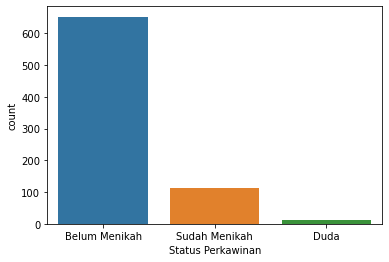

In [155]:
sns.countplot(data=user_data_cleaned, x='Status Perkawinan')

### Provinsi

In [156]:
user_data['Provinsi'].value_counts()

Jawa Barat                   577
Jakarta                      323
Jawa Timur                   286
Jawa Tengah                  230
Bali                         197
Banten                       177
Sumatera Selatan              40
DKI Jakarta                   35
Sumatera Utara                34
Lampung                       30
NTB                           29
Riau                          29
Sulawesi Selatan              27
NTT                           20
Sumatera Barat                19
Kalimantan Timur              15
Jambi                         12
Kalimantan Selatan            12
Maluku                        10
Aceh                           8
DI Yogyakarta                  8
Sumatera                       8
Kalimantan Tengah              7
Bengkulu                       7
Tangerang                      7
Papua                          6
Nusa Tenggara Barat            6
Sulawesi Utara                 4
Bangka Belitung                3
Gorontalo                      3
Sulawesi B

In [157]:
user_data_cleaned['Provinsi'].value_counts()

Jawa Barat                   562
Jakarta                      321
Jawa Timur                   280
Jawa Tengah                  224
Bali                         196
Banten                       175
Sumatera Selatan              40
Sumatera Utara                34
NTB                           29
DKI Jakarta                   28
Riau                          28
Lampung                       27
Sulawesi Selatan              24
NTT                           20
Sumatera Barat                19
Kalimantan Timur              15
Jambi                         12
Kalimantan Selatan            12
Maluku                        10
Aceh                           8
Sumatera                       8
Bengkulu                       7
Tangerang                      7
Kalimantan Tengah              6
Papua                          6
DI Yogyakarta                  6
Sulawesi Utara                 4
Nusa Tenggara Barat            4
Gorontalo                      3
Papua Barat                    3
Sulawesi T

In [158]:
replace_value(['Jawa barat','Bogor'], 'Jawa Barat',user_data_cleaned,'Provinsi')

In [159]:

# Coba cek di colab apakah DKI Jakarta sama dengan Daerah Ibu Kota Jakarta
replace_value(['Jakarta'], 'DKI Jakarta',user_data_cleaned,'Provinsi')

In [160]:
replace_value(['Tangerang'], 'Banten',user_data_cleaned,'Provinsi')

In [161]:
replace_value(['NTB'], 'Nusa Tenggara Barat',user_data_cleaned,'Provinsi')

In [162]:
replace_value(['NTT', 'Kupang'], 'Nusa Tenggara Timur',user_data_cleaned,'Provinsi')

In [163]:
replace_value(['Belitung', 'Bangka Belitung'], 'Kepulauan Bangka Belitung',user_data_cleaned,'Provinsi')

In [164]:
replace_value(['Sulwesi Tengah'], 'Sulawesi Tengah',user_data_cleaned,'Provinsi')

In [165]:
replace_value(['Balikpapan'], 'Kalimantan Timur',user_data_cleaned,'Provinsi')

In [166]:
user_data_cleaned['Provinsi'].value_counts()

Jawa Barat                   564
DKI Jakarta                  349
Jawa Timur                   280
Jawa Tengah                  224
Bali                         196
Banten                       182
Sumatera Selatan              40
Sumatera Utara                34
Nusa Tenggara Barat           33
Riau                          28
Lampung                       27
Sulawesi Selatan              24
Nusa Tenggara Timur           21
Sumatera Barat                19
Kalimantan Timur              16
Kalimantan Selatan            12
Jambi                         12
Maluku                        10
Aceh                           8
Sumatera                       8
Bengkulu                       7
Kalimantan Tengah              6
Papua                          6
DI Yogyakarta                  6
Kepulauan Bangka Belitung      5
Sulawesi Utara                 4
Sulawesi Tenggara              3
Papua Barat                    3
Gorontalo                      3
Sulawesi Barat                 3
Kalimantan

In [167]:
user_data_cleaned['Kendaraan Digunakan'].value_counts()

Motor                                      764
Lainnya                                    189
Kendaraan Umum                             169
Transportasi Umum                           79
Mobil                                       33
motor                                       32
Public Transport                            11
public transport                            11
Pick Up                                      9
Public Transportaton                         8
Modified Motor                               4
Sepeda                                       3
-                                            3
Kendaraan umum                               3
Angkutan Umum                                3
Tidak ada                                    2
sepeda                                       2
bus                                          2
Angkutan umum                                2
3 tire motor                                 2
Ojek                                         2
Bicycle      

## Data Rekrut

# EDA

In [168]:
rekrut.head()

,No,Nama Lengkap,Jenis Kelamin,Jenis Disabilitas,Cabang Perusahaan,Perusahaan Dilamar,Posisi Dilamar,Tanggal Mulai,Tanggal Selesai,Nama PIC,Kontak PIC,Unnamed: 11
0,1.0,Ade muhamad iman,NaN,Polio,Bandung,Alfamart,warehouse,2018-10-01,2019-03-18 00:00:00,Ibu Yara,NaN,NaN
1,2.0,R guntur saetapi,NaN,Polio one leg,Bandung,Alfamart,crewstore,2018-10-02,present,Ibu Yara,NaN,NaN
2,3.0,Ujang maulana ramdan,L,Conginental Hand,Bandung,Alfamart,warehouse,2018-10-03,present,Ibu Yara,NaN,NaN
3,4.0,Moh Duta Prakarsa,NaN,Deaf,Bandung,Alfamart,warehouse,2018-10-01,present,Ibu Yara,NaN,NaN
4,5.0,Devi Juariah,NaN,Deaf,Bandung,Alfamart,crewstore,2018-10-01,2019-02-18 00:00:00,Ibu Yara,NaN,NaN


In [169]:
rekrut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   No                  127 non-null    float64       
 1   Nama Lengkap        127 non-null    object        
 2   Jenis Kelamin       114 non-null    object        
 3   Jenis Disabilitas   121 non-null    object        
 4   Cabang Perusahaan   127 non-null    object        
 5   Perusahaan Dilamar  127 non-null    object        
 6   Posisi Dilamar      121 non-null    object        
 7   Tanggal Mulai       98 non-null     datetime64[ns]
 8   Tanggal Selesai     35 non-null     object        
 9   Nama PIC            78 non-null     object        
 10  Kontak PIC          36 non-null     object        
 11  Unnamed: 11         6 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 12.0+ KB


In [170]:
rekrut.isna().sum()

No                      0
Nama Lengkap            0
Jenis Kelamin          13
Jenis Disabilitas       6
Cabang Perusahaan       0
Perusahaan Dilamar      0
Posisi Dilamar          6
Tanggal Mulai          29
Tanggal Selesai        92
Nama PIC               49
Kontak PIC             91
Unnamed: 11           121
dtype: int64

## DATA CLEANING

### Column Nama lengkap

In [172]:
rekrut['Nama Lengkap'] = rekrut['Nama Lengkap'].str.title()
rekrut.head()

,No,Nama Lengkap,Jenis Kelamin,Jenis Disabilitas,Cabang Perusahaan,Perusahaan Dilamar,Posisi Dilamar,Tanggal Mulai,Tanggal Selesai,Nama PIC,Kontak PIC,Unnamed: 11
0,1.0,Ade Muhamad Iman,NaN,Polio,Bandung,Alfamart,warehouse,2018-10-01,2019-03-18 00:00:00,Ibu Yara,NaN,NaN
1,2.0,R Guntur Saetapi,NaN,Polio one leg,Bandung,Alfamart,crewstore,2018-10-02,present,Ibu Yara,NaN,NaN
2,3.0,Ujang Maulana Ramdan,L,Conginental Hand,Bandung,Alfamart,warehouse,2018-10-03,present,Ibu Yara,NaN,NaN
3,4.0,Moh Duta Prakarsa,NaN,Deaf,Bandung,Alfamart,warehouse,2018-10-01,present,Ibu Yara,NaN,NaN
4,5.0,Devi Juariah,NaN,Deaf,Bandung,Alfamart,crewstore,2018-10-01,2019-02-18 00:00:00,Ibu Yara,NaN,NaN


### Column Jenis Disabilitas

Menyeragamkan jenis disabilitas menjadi 5 kelompok yaitu

*   Tuli
*   Tunanetra
*   Disabilitas Fisik
*   Disabilitas Intelektual
*   Disabilitas Tidak Terlihat (ADHD, Disleksia, Autis, dll)
*   Tidak ada

In [173]:
rekrut['Jenis Disabilitas'].value_counts()

Daksa                                          39
Tuli                                           18
ADHD                                           13
Deaf                                           10
DAKSA                                           7
Tunanetra                                       7
TULI                                            6
Tuna netra                                      4
Daksa Kaki                                      3
Blind                                           2
Tuna Daksa                                      2
Hard of Hearing                                 1
Autis                                           1
Low Vision                                      1
Polio                                           1
Tuna Netra                                      1
Polio one leg                                   1
Amputee                                         1
Prostese kaki kanan dan jari2 tidak lengkap     1
Conginental Hand                                1


In [174]:
def replace_value(lis,a,data=rekrut,colom="Jenis Disabilitas"):
    for i in lis:
        data.loc[data[colom] == i,colom] = a

In [175]:
Tuli_list = ['Tuli', 'Deaf', 'TULI', 'Hard of Hearing']
Tunanetra_list = ['Tunanetra', 'Tuna netra', 'Low Vision', 'Blind', 'Tuna Netra']
Dis_Fisik_list = ['Daksa', 'DAKSA', 'Polio', 'Polio one leg', 'Amputee', 'Tuna Daksa', 'Daksa Kaki', 'Prostese kaki kanan dan jari2 tidak lengkap', 'Conginental Hand']
Dis_Intelektual_list = ['Autis', 'Asperger']
Dis_Tidak_Terlihat_list = ['ADHD']
Tidak_ada_list = []

replace_value(Tuli_list,"Tuli")
replace_value(Tunanetra_list,"Tunanetra")
replace_value(Dis_Fisik_list,"Disabilitas Fisik")
replace_value(Dis_Intelektual_list,"Disabilitas Intelektual")
replace_value(Dis_Tidak_Terlihat_list,"Disabilitas Tidak Terlihat")
replace_value(Tidak_ada_list,"Tidak Ada")

In [176]:
rekrut['Jenis Disabilitas'].value_counts()

Disabilitas Fisik             56
Tuli                          35
Tunanetra                     15
Disabilitas Tidak Terlihat    13
Disabilitas Intelektual        2
Name: Jenis Disabilitas, dtype: int64

### Column Jenis Kelamin

In [177]:
def replace_value(lis,a,data=rekrut,colom="Jenis Kelamin"):
    for i in lis:
        data.loc[data[colom] == i,colom] = a

In [178]:
Laki_laki_list = ['L']
Perempuan_list = ['P']


replace_value(Laki_laki_list,"Laki-laki")
replace_value(Perempuan_list,"Perempuan")

In [179]:
rekrut['Jenis Kelamin'].value_counts()

Laki-laki    69
Perempuan    45
Name: Jenis Kelamin, dtype: int64

### Column Cabang Perusahaan (Area)

In [180]:
rekrut['Cabang Perusahaan'].value_counts()

Jakarta                      28
Bali                         15
Bandung                      10
Tangerang                     8
Sidoarjo                      5
Semarang                      5
masih menunggu penempatan     4
Yogyakarta                    4
Bogor                         4
jakarta                       3
Malang                        3
Cileungsi                     3
BEKASI                        2
NTT                           2
Bekasi                        2
PARUNG                        2
Ciamis                        1
MEDAN                         1
BOGOR                         1
Jember                        1
KARAWANG                      1
SEMARANG                      1
Lampung                       1
Kota Pasuruan                 1
SIDOARJO                      1
MALANG                        1
sulawesi selatan              1
BATAM                         1
Pasuruan                      1
Banjarmasin                   1
Cikarang                      1
Medan (O

### Column Perusahaan Dilamar

In [181]:
rekrut['Perusahaan Dilamar'].value_counts()

Alfamart                     57
Think.Web                     7
BEDO                          4
Indika Foundation             3
Tokopedia                     3
Surfaid                       3
Alfamidi                      2
Ngalup.co                     2
Campaign,id                   2
Brave Factor                  2
Fair Trade Indonesia          2
MANIKA                        2
Bukalapak                     2
Borwita                       2
Jembatan Bahasa               2
Reckitt Indonesia             2
Toped/Mitracomm               2
CIMB                          2
Loreal                        2
Pegadaian                     2
Avery Dennison                2
Kalbe Farma                   1
Maharani Craft                1
Sagala                        1
Alfamart Cileungsi            1
Ethical                       1
Alfamart Bekasi               1
BCA                           1
Infomedia Solusi Humanika     1
Made Tea                      1
EVOMO.ID                      1
SUrfaid 

### Column Posisi Dilamar

In [182]:
rekrut['Posisi Dilamar'].value_counts()

Crew Store                      17
Call Centre                     10
Content Writer                   9
Design Grafis                    9
warehouse                        8
CREW                             7
Content Writing                  6
Helper                           6
Pramuniaga                       4
crewstore                        4
Graphic Designer                 4
Helper (Progress)\n              3
Video Editor                     3
Marketing                        3
telesales                        2
Telesales                        2
SEO                              2
asistant HR n logistik           1
Mitra                            1
HR                               1
tax officer                      1
Crew                             1
helper retur                     1
Helper (Retur)\n                 1
Helper (Issuing)                 1
Accounting                       1
 DEI officer                     1
Social Media Editorial           1
helper              

In [183]:
# ubah nama jadi seragam, kapital di awal kata
rekrut['Posisi Dilamar'] = rekrut['Posisi Dilamar'].str.title()

In [184]:
rekrut_merge = rekrut.merge(user_data, how='left', on='Nama Lengkap')

In [185]:
rekrut_merge.head()

,No_x,Nama Lengkap,Jenis Kelamin_x,Jenis Disabilitas_x,Cabang Perusahaan,Perusahaan Dilamar,Posisi Dilamar,Tanggal Mulai,Tanggal Selesai,Nama PIC,Kontak PIC,Unnamed: 11,No_y,Email Address,Tempat Tanggal Lahir,Tanggal Lahir (cleaned),Jenis Kelamin_y,Status Perkawinan,Alamat Lengkap,Kabupaten/Kota,Provinsi,Kendaraan Digunakan,No. HP,No. Hp Keluarga,Email,Pendidikan Terakhir,Yang diperlukan,Jenis Disabilitas_y,Bidang Pekerjaan,Training Kerja Diingingkan(Opsional),Alat Bantu,Keterampilan Dimiliki,Pengalaman Kerja,Darimana Tahu Difalink,Media Sosial,Ijazah PDF,Jurusan Pendidikan Terakhir,KTP PDF,CV PDF,Penjelasan Detail Disabilitas,Bukti Disabilitas/Surat Keterangan Disabilitas,Unnamed: 30
0,1.0,Ade Muhamad Iman,NaN,Disabilitas Fisik,Bandung,Alfamart,Warehouse,2018-10-01,2019-03-18 00:00:00,Ibu Yara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,R Guntur Saetapi,NaN,Disabilitas Fisik,Bandung,Alfamart,Crewstore,2018-10-02,present,Ibu Yara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Ujang Maulana Ramdan,Laki-laki,Disabilitas Fisik,Bandung,Alfamart,Warehouse,2018-10-03,present,Ibu Yara,NaN,NaN,596.0,NaN,Tobelo,NaN,L,Belum Menikah,KP.BOJONGGENTENG RT005 RW002 KEL DESA BOJONGGE...,sukabumi,Jawa Barat,NaN,82120755533.0,NaN,ujang210295@gmail.com,NaN,NaN,Daksa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Moh Duta Prakarsa,NaN,Tuli,Bandung,Alfamart,Warehouse,2018-10-01,present,Ibu Yara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Devi Juariah,NaN,Tuli,Bandung,Alfamart,Crewstore,2018-10-01,2019-02-18 00:00:00,Ibu Yara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
rekrut_merge_2 = rekrut.merge(user_data_cleaned, how='left', on='Nama Lengkap')

In [187]:
rekrut_merge.shape

(131, 42)

In [188]:
rekrut.shape

(127, 12)

In [189]:
rekrut_merge_2.shape

(128, 42)

In [190]:
rekrut_merge.isna().sum()

No_x                                                0
Nama Lengkap                                        0
Jenis Kelamin_x                                    13
Jenis Disabilitas_x                                 6
Cabang Perusahaan                                   0
Perusahaan Dilamar                                  0
Posisi Dilamar                                      6
Tanggal Mulai                                      29
Tanggal Selesai                                    94
Nama PIC                                           50
Kontak PIC                                         94
Unnamed: 11                                       124
No_y                                               68
Email Address                                      88
Tempat Tanggal Lahir                               73
Tanggal Lahir (cleaned)                           121
Jenis Kelamin_y                                    73
Status Perkawinan                                  81
Alamat Lengkap              

### Column Cabang Perusahaan

In [191]:
def replace_value(lis,a,data=rekrut_merge,colom="Cabang Perusahaan"):
    for i in lis:
        data.loc[data[colom] == i,colom] = a

In [192]:
Jakarta_list = ['jakarta', '']
Bali_list = ['Bali']
Jawa_Barat_list = ['Bandung', 'Bogor', 'Cileungsi', 'Bekasi', 'BEKASI', 'PARUNG', 'Ciamis', 'BOGOR', 'KARAWANG', 'Cikarang', 'Karawang', 'Cileungsi 2', 'Cimahi']
Banten_list = ['Tanggerang', 'tanggerang', 'tangerang', 'Tangerang']
Jawa_Timur_list = ['Sidoarjo', 'Malang', 'Jember', 'Kota Pasuruan', 'SIDOARJO', 'MALANG', 'Pasuruan', 'Surabaya']
Jawa_Tengah_list = ['Semarang', 'SEMARANG', 'Cilacap', 'Klaten']
Menunggu_Penempatan_list = ['masih menunggu penempatan']
DI_Yogyakarta_list = ['Yogyakarta']
NTT_list = ['NTT']
Sumatra_Utara_list = ['MEDAN', 'Medan (Online)', 'Medan']
Lampung_list = ['Lampung']
Sulawesi_Selatan_list = ['sulawesi selatan']
Batam_list = ['BATAM']
Kalimantan_Selatan_list = ['Banjarmasin']
Maluku_list = ['Ambon']
Bali_list = ['Bali/online', 'Denpasar']


In [193]:
replace_value(Jakarta_list,"Jakarta")
replace_value(Jawa_Barat_list,"Jawa Barat")
replace_value(Banten_list,"Banten")
replace_value(Jawa_Timur_list,"Jawa Timur")
replace_value(Jawa_Tengah_list,"Jawa Tengah")
replace_value(Menunggu_Penempatan_list,"Others")
replace_value(Jakarta_list,"Jakarta")
replace_value(DI_Yogyakarta_list,"DI Yogyakarta")
replace_value(NTT_list,"Nusa Tenggara Timur")
replace_value(Sumatra_Utara_list,"Sumatra Utara")
replace_value(Lampung_list,"Lampung")
replace_value(Sulawesi_Selatan_list,"Sulawesi Selatan")
replace_value(Batam_list,"Batam")
replace_value(Kalimantan_Selatan_list,"Kalimantan Selatan")
replace_value(Maluku_list,"Maluku")
replace_value(Bali_list,"Bali")


In [194]:
rekrut_merge['Cabang Perusahaan'].value_counts()

Jawa Barat             31
Jakarta                31
Bali                   17
Jawa Timur             15
Banten                 10
Jawa Tengah             8
DI Yogyakarta           5
Others                  4
Sumatra Utara           3
Nusa Tenggara Timur     2
Maluku                  1
Kalimantan Selatan      1
Batam                   1
Sulawesi Selatan        1
Lampung                 1
Name: Cabang Perusahaan, dtype: int64

### Column Pendidikan

In [195]:
def replace_value(lis,a,data=rekrut_merge,colom="Pendidikan Terakhir"):
    for i in lis:
        data.loc[data[colom] == i,colom] = a

In [196]:
SMP_list = ['SMP']
SMA_SMK_list = ['SMA', 'SMK', 'SMA/SMK']
D1_list = ['D1']
D3_list = ['D3', 'Diploma 3']
D4_S1_list = ['S1', 'D4/S1', 'Diploma 4 / Sarjana']
Others_List = ['Uncompleted Info']

replace_value(SMP_list,"SMP")
replace_value(SMA_SMK_list,"SMA/SMK")
replace_value(D1_list,"D1")
replace_value(D3_list,"D3")
replace_value(D4_S1_list,"D4/S1")
replace_value(Others_List,"Others")

In [197]:
rekrut_merge['Pendidikan Terakhir'].value_counts()

SMA/SMK    30
D4/S1      16
D3          8
Others      2
D1          1
SMP         1
Name: Pendidikan Terakhir, dtype: int64

## Analisis Data


### 1. Data area pencari kerja disabilitas yang aktif mencari pekerjaan

In [ ]:
pelamar_loker['Provinsi'].value_counts()

Jawa Barat                   182
Jawa Timur                    82
DKI Jakarta                   72
Banten                        69
Jawa Tengah                   60
Sumatera Selatan              14
DI Yogyakarta                 14
Sumatera Utara                13
Lampung                       13
Sulawesi Selatan               6
Nusa Tenggara Barat            6
Sumatera Barat                 4
Jambi                          3
Kalimantan Timur               2
Kepulauan Bangka Belitung      2
Bali                           2
Gorontalo                      1
Sulawesi Utara                 1
Riau                           1
Name: Provinsi, dtype: int64

Text(0.5, 1.0, 'Jumlah pencari kerja disabilitas berdasarkan provinsi')

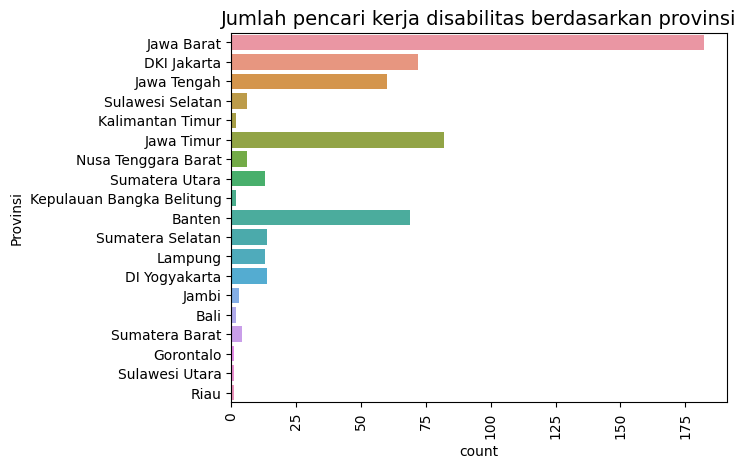

In [ ]:
# Jumlah pencari kerja disabilitas berdasarkan asal provinsi
d = sns.countplot(data=pelamar_loker, y='Provinsi')
plt.xticks(rotation=90)
d.set_title("Jumlah pencari kerja disabilitas berdasarkan provinsi", fontsize = 14)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Jawa Barat'),
  Text(1, 0, 'DKI Jakarta'),
  Text(2, 0, 'Jawa Tengah'),
  Text(3, 0, 'Sulawesi Selatan'),
  Text(4, 0, 'Kalimantan Timur'),
  Text(5, 0, 'Jawa Timur'),
  Text(6, 0, 'Nusa Tenggara Barat'),
  Text(7, 0, 'Sumatera Utara'),
  Text(8, 0, 'Kepulauan Bangka Belitung'),
  Text(9, 0, 'Banten'),
  Text(10, 0, 'Sumatera Selatan'),
  Text(11, 0, 'Lampung'),
  Text(12, 0, 'DI Yogyakarta'),
  Text(13, 0, 'Jambi'),
  Text(14, 0, 'Bali'),
  Text(15, 0, 'Sumatera Barat'),
  Text(16, 0, 'Gorontalo'),
  Text(17, 0, 'Sulawesi Utara'),
  Text(18, 0, 'Riau')])

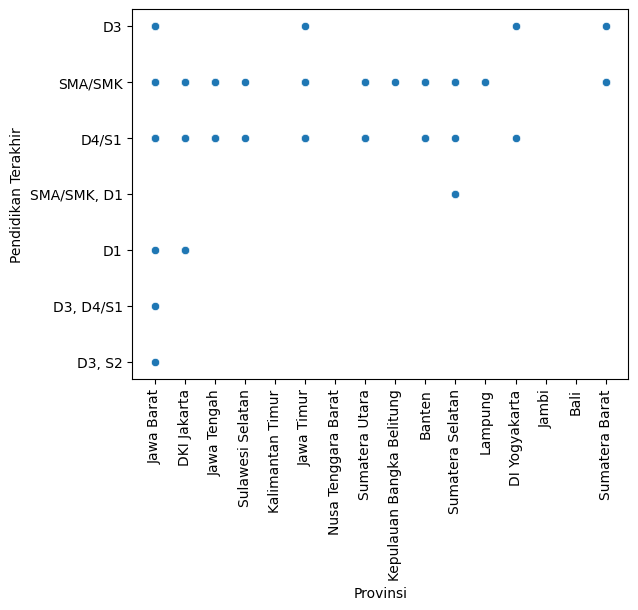

In [ ]:
# # Persebaran pencari kerja disabilitas berdasarkan asal provinsi dan pendidikan terakhir
sns.scatterplot(data=pelamar_loker, x='Provinsi', y='Pendidikan Terakhir')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, 'Jawa Timur'),
  Text(1, 0, 'Jakarta'),
  Text(2, 0, 'Jawa Barat'),
  Text(3, 0, 'Bali'),
  Text(4, 0, 'Jawa Tengah'),
  Text(5, 0, 'Banten'),
  Text(6, 0, 'Sumatera'),
  Text(7, 0, 'DI Yogyakarta'),
  Text(8, 0, 'Sulawesi Selatan'),
  Text(9, 0, 'DKI Jakarta'),
  Text(10, 0, 'Sumatera Selatan'),
  Text(11, 0, 'Lampung'),
  Text(12, 0, 'Kalimantan Selatan'),
  Text(13, 0, 'Kalimantan Barat'),
  Text(14, 0, 'Sumatera Barat'),
  Text(15, 0, 'NTB'),
  Text(16, 0, 'Riau'),
  Text(17, 0, 'Jambi'),
  Text(18, 0, 'Sumatera Utara'),
  Text(19, 0, 'Papua Barat'),
  Text(20, 0, 'Aceh'),
  Text(21, 0, 'Bengkulu'),
  Text(22, 0, 'Sulawesi Barat'),
  Text(23, 0, 'Papua'),
  Text(24, 0, 'Gorontalo'),
  Text(25, 0

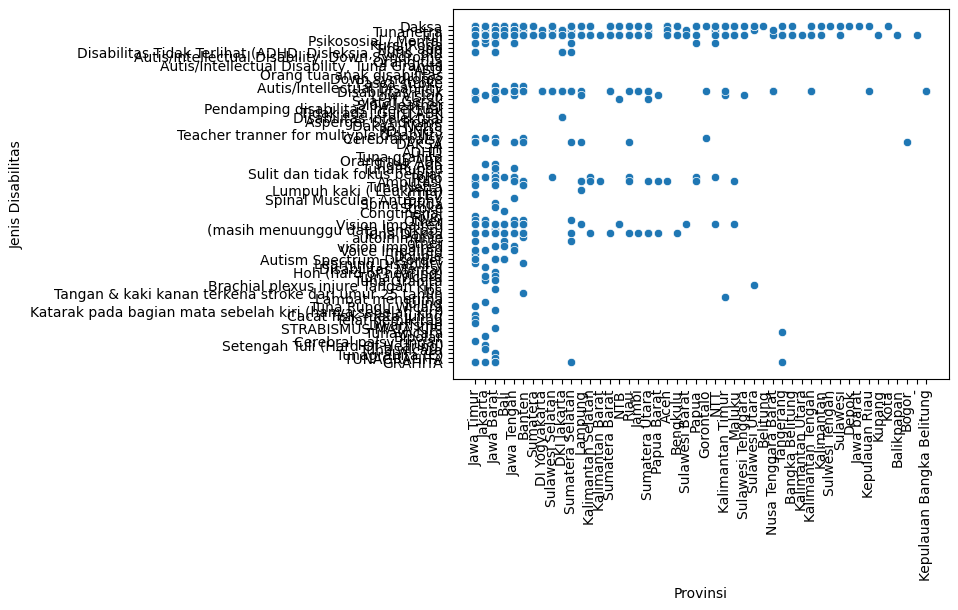

In [ ]:
# Jumlah pencari kerja disabilitas berdasarkan asal provinsi
sns.scatterplot(data=user_data, x='Provinsi', y='Jenis Disabilitas')
plt.xticks(rotation=90)

### 2. Jumlah perusahaan yang sejauh ini aktif membuka lowongan kerja dan merekrut penyandang disabilitas via difalink

In [ ]:
print(lowongan_kerja['Nama Perusahaan'].unique())
len(lowongan_kerja['Nama Perusahaan'].unique())

['PT Infomedia Nusantara' 'United Nations Volunteers Programme (UNV)'
 'Persolkelly' 'PT. Aneka Petroindo Raya' 'PT Berdikari'
 'Mitracomm Ekasarana' 'PT Borwita Citra Prima cabang Yogya'
 'PT Mitracomm Ekasarana Semarang' 'PT. Sumber Alfaria Trijaya, tbk'
 'Reckitt Indonesia' 'PT. Infomedia Nusantara by Telkom'
 'Matahari Department Store' 'PT. Klik Eat Indonesia'
 'PT. Midi Utama Indonesia Tbk'
 'PT.Midi Utama Indonesia Tbk. (Branch Pasuruan)' 'Supri Van Java Film']


16

### 3. Jumlah penyandang disabilitas yang sejauh ini banyak direkrut via difalink berdasarkan pendidikan, area, dan gender

In [ ]:
# make function that shows percentage of data
def show_percent(data, values):
    data["percent"] = round(data[values]*100/data[values].sum(),1)
    print(data)

# make function that returns percentage of data
def get_percent(data, values):
    data = round(data[values]*100/data[values].sum(),1)


#### Pendidikan

Text(0.5, 1.0, 'Jumlah Penyandang Disabilitas Diterima Kerja Via Difalink Berdasarkan Pendidikan')

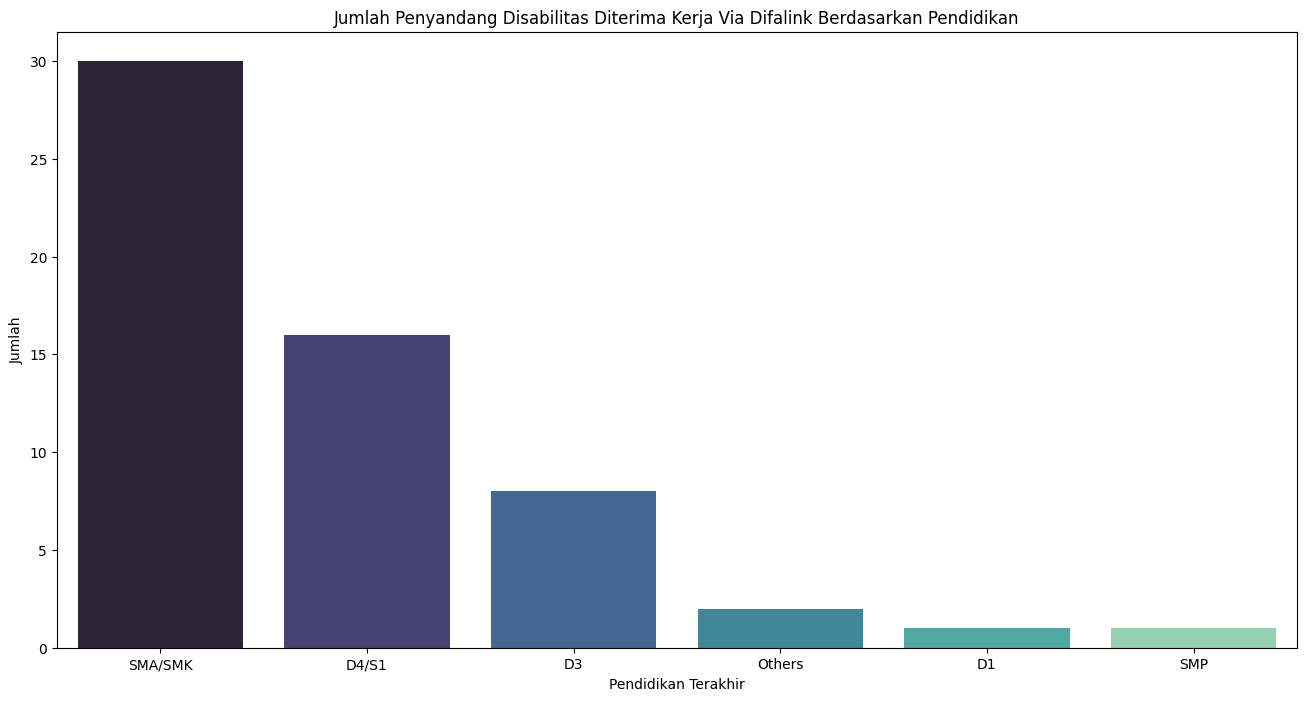

In [ ]:
# from matplotlib.ticker import MaxNLocator

size = (16, 8)
fig, ax = plt.subplots(figsize = size)
ax = sns.countplot(x='Pendidikan Terakhir', data=rekrut_merge, palette = 'mako', order=rekrut_merge['Pendidikan Terakhir'].value_counts().index)
plt.ylabel('Jumlah')
ax.set_title('Jumlah Penyandang Disabilitas Diterima Kerja Via Difalink Berdasarkan Pendidikan', fontsize = 12)
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# for container in ax.containers:
#     ax.bar_label(container)
# total = float(len(rekrut_merge['Pendidikan Terakhir']))
# for p in ax.patches:
#     percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#     x = p.get_x() + p.get_width()
#     y = p.get_height()
#     ax.annotate(percentage, (x, y),ha='left',fontsize=12)

#### Cabang Perusahaan (Area)

Text(0.5, 1.0, 'Jumlah Penyandang Disabilitas Diterima Kerja Via Difalink Berdasarkan Cabang Perusahaan (Area)')

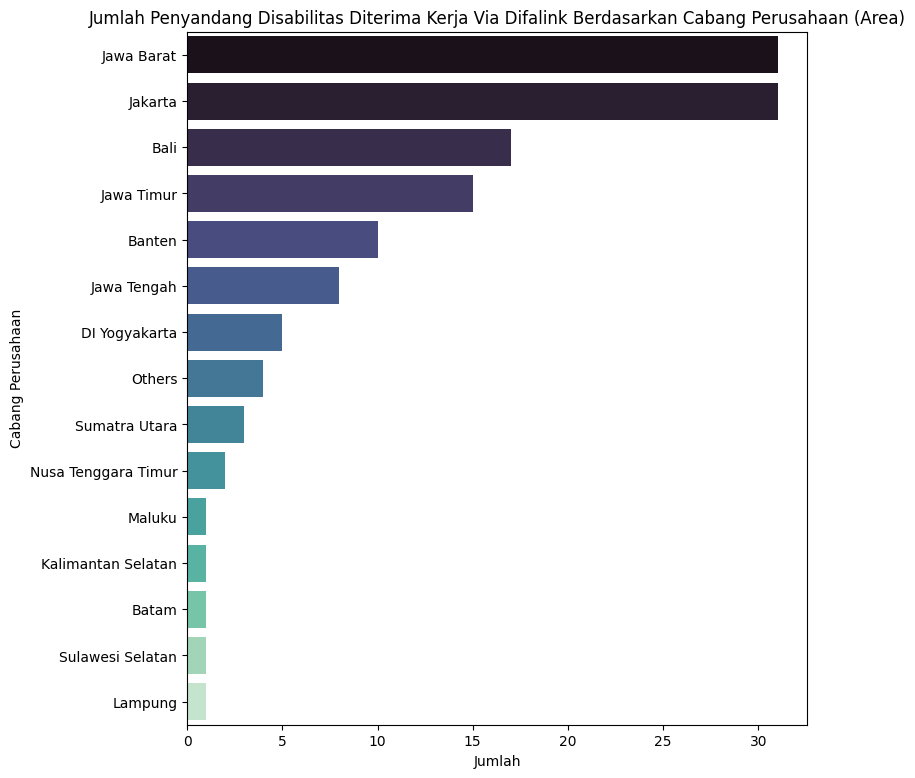

In [ ]:
size = (8, 9)
fig, ax = plt.subplots(figsize = size)
ax = sns.countplot(y='Cabang Perusahaan', data=rekrut_merge, palette = 'mako', order=rekrut_merge['Cabang Perusahaan'].value_counts().index)
plt.xlabel('Jumlah')
ax.set_title('Jumlah Penyandang Disabilitas Diterima Kerja Via Difalink Berdasarkan Cabang Perusahaan (Area)', fontsize = 12)
# for container in ax.containers:
#     ax.bar_label(container)

#### Gender

Text(0.5, 1.0, 'Jumlah Penyandang Disabilitas Diterima Kerja Berdasarkan Gender')

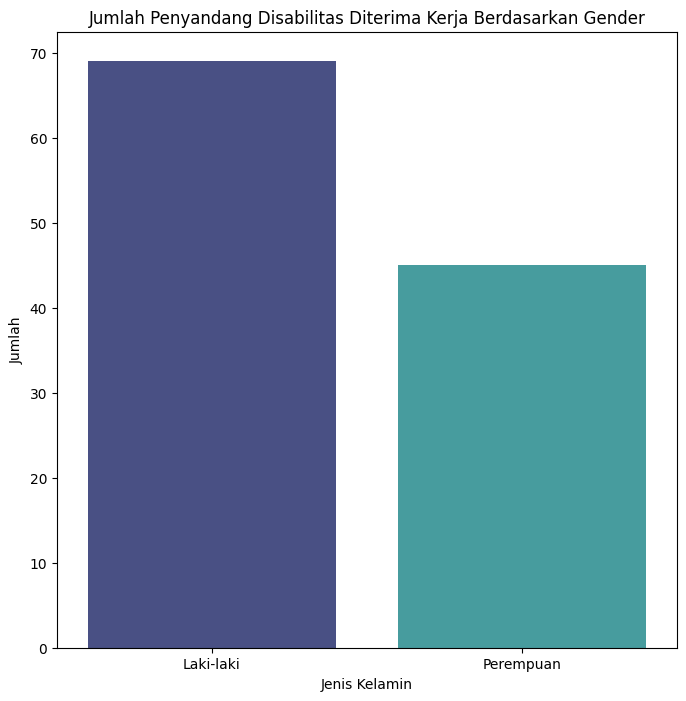

In [ ]:
size = (8, 8)
fig, ax = plt.subplots(figsize = size)
ax = sns.countplot(x='Jenis Kelamin', data=rekrut, palette = 'mako')
plt.ylabel('Jumlah')
ax.set_title('Jumlah Penyandang Disabilitas Diterima Kerja Berdasarkan Gender', fontsize = 12)
# for container in ax.containers:
#     ax.bar_label(container)

#### Pendidikan dengan Gender

Text(0.5, 1.0, 'Jumlah Penyandang Disabilitas Diterima Kerja Via Difalink Berdasarkan Pendidikan dengan Gender')

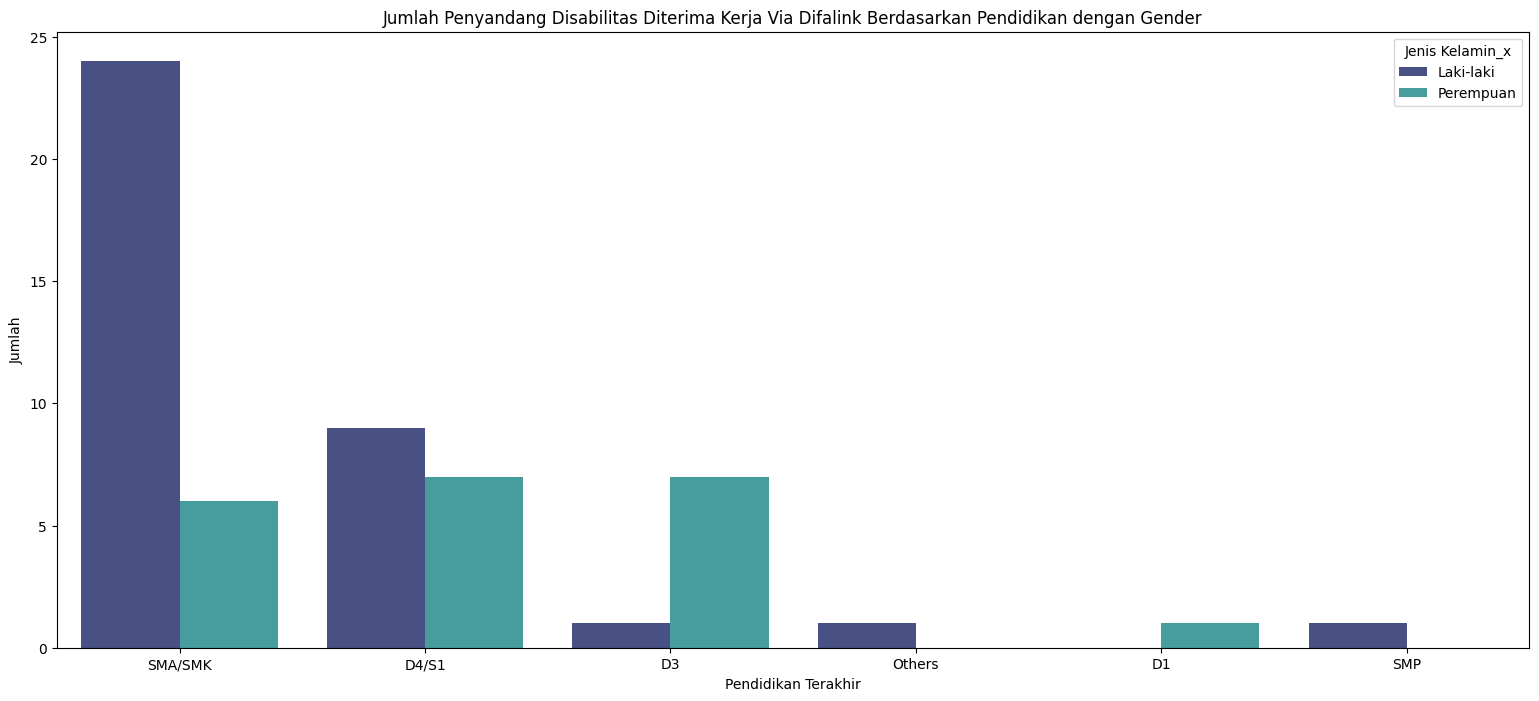

In [ ]:
size = (19, 8)
fig, ax = plt.subplots(figsize = size)
ax = sns.countplot(x='Pendidikan Terakhir', hue='Jenis Kelamin_x', data=rekrut_merge, palette = 'mako', order=rekrut_merge['Pendidikan Terakhir'].value_counts().index)
plt.ylabel('Jumlah')
ax.set_title('Jumlah Penyandang Disabilitas Diterima Kerja Via Difalink Berdasarkan Pendidikan dengan Gender', fontsize = 12)
# for container in ax.containers:
#     ax.bar_label(container)

#### Jenis Disabilitas

Text(0.5, 1.0, 'Jumlah Penyandang Disabilitas Diterima Kerja Berdasarkan Pendidikan')

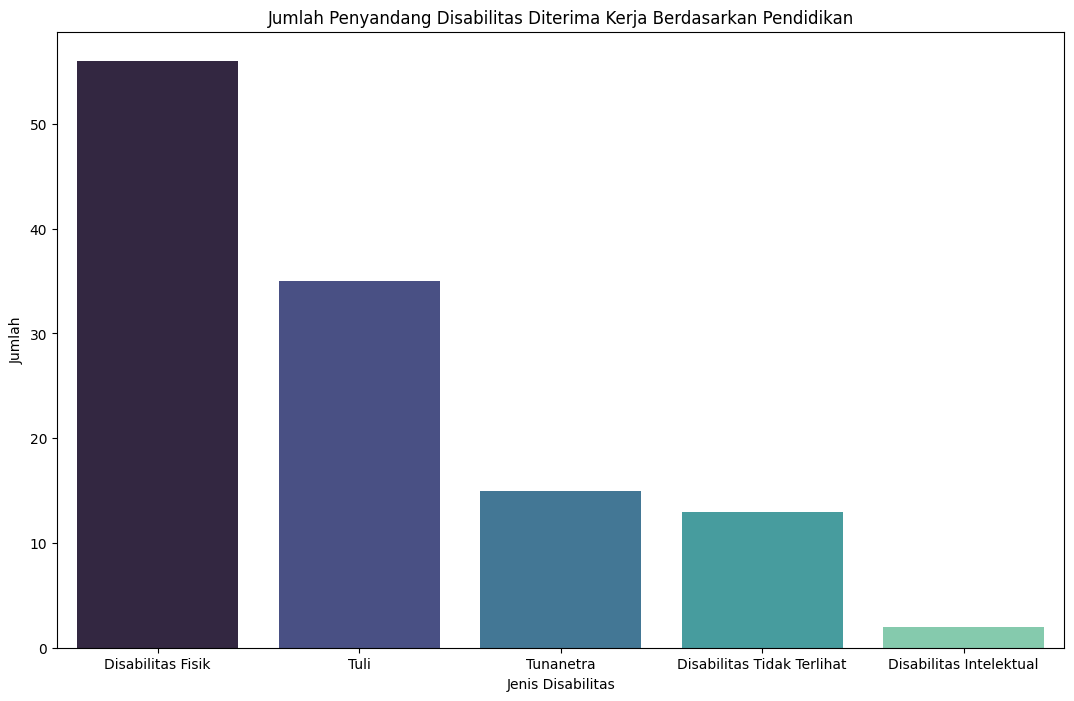

In [ ]:
size = (13, 8)
fig, ax = plt.subplots(figsize = size)
ax = sns.countplot(x='Jenis Disabilitas', data=rekrut, palette = 'mako', order=rekrut['Jenis Disabilitas'].value_counts().index)
plt.ylabel('Jumlah')
ax.set_title('Jumlah Penyandang Disabilitas Diterima Kerja Berdasarkan Pendidikan', fontsize = 12)
# for container in ax.containers:
#   ax.bar_label(container)

#### Jenis Disabilitas dengan Gender

Text(0.5, 1.0, 'Jumlah Penyandang Disabilitas Diterima Kerja Berdasarkan Pendidikan')

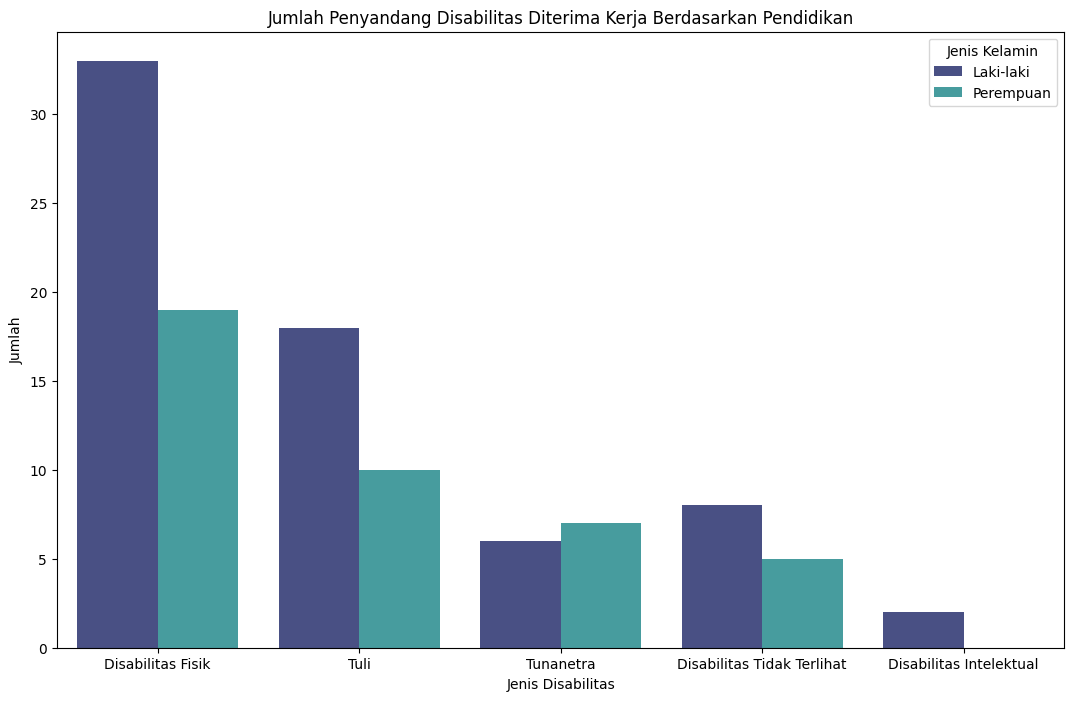

In [ ]:
size = (13, 8)
fig, ax = plt.subplots(figsize = size)
ax = sns.countplot(x='Jenis Disabilitas', hue='Jenis Kelamin', data=rekrut, palette = 'mako', order=rekrut['Jenis Disabilitas'].value_counts().index)
plt.ylabel('Jumlah')
ax.set_title('Jumlah Penyandang Disabilitas Diterima Kerja Berdasarkan Pendidikan', fontsize = 12)
#for container in ax.containers:
#    ax.bar_label(container)

#### Perusahaan Dilamar

Text(0.5, 1.0, 'Jumlah Penyandang Disabilitas Diterima Kerja Berdasarkan Perusahaan Dilamar')

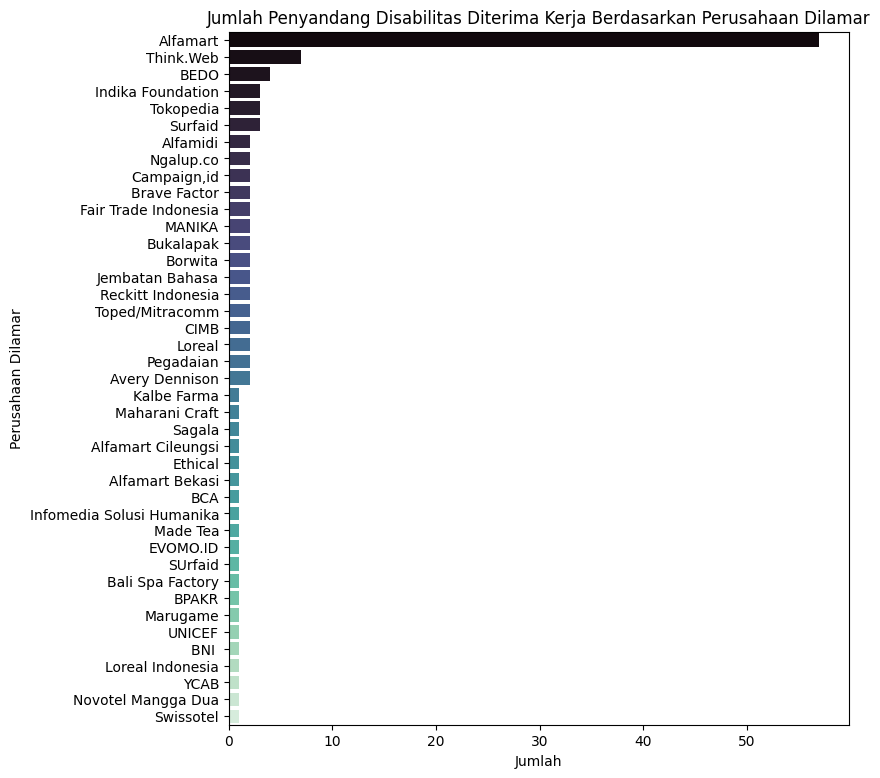

In [ ]:
size = (8, 9)
fig, ax = plt.subplots(figsize = size)
ax = sns.countplot(y='Perusahaan Dilamar', data=rekrut, palette = 'mako', order=rekrut['Perusahaan Dilamar'].value_counts().index)
plt.xlabel('Jumlah')
ax.set_title('Jumlah Penyandang Disabilitas Diterima Kerja Berdasarkan Perusahaan Dilamar', fontsize = 12)
#for container in ax.containers:
#    ax.bar_label(container)

#### Posisi Dilamar

Text(0.5, 1.0, 'Jumlah Penyandang Disabilitas Diterima Kerja Berdasarkan Posisi Dilamar')

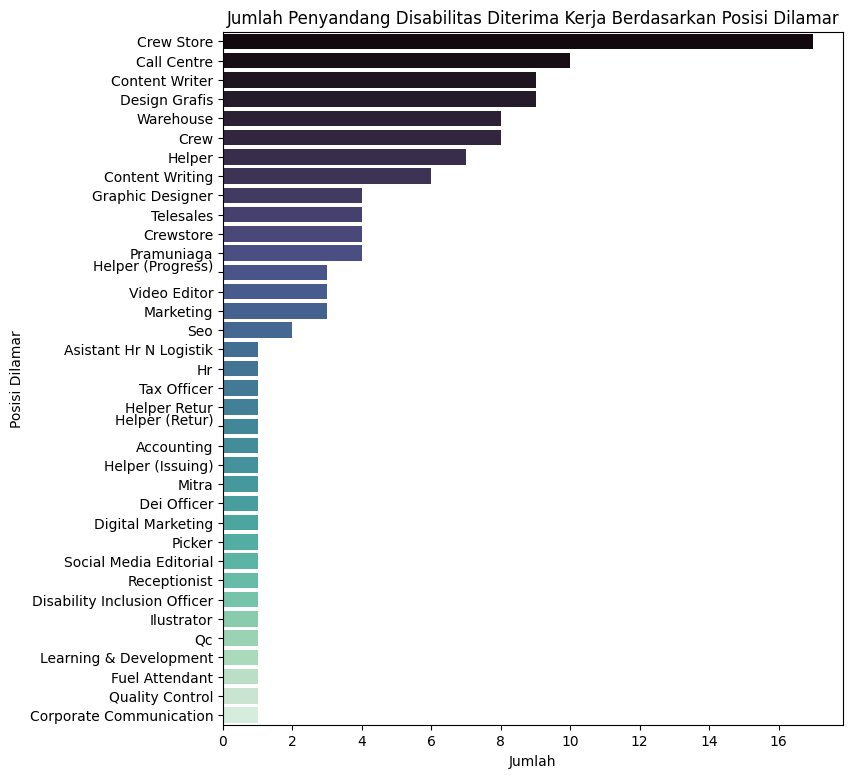

In [ ]:
size = (8, 9)
fig, ax = plt.subplots(figsize = size)
ax = sns.countplot(y='Posisi Dilamar', data=rekrut, palette = 'mako', order=rekrut['Posisi Dilamar'].value_counts().index)
plt.xlabel('Jumlah')
ax.set_title('Jumlah Penyandang Disabilitas Diterima Kerja Berdasarkan Posisi Dilamar', fontsize = 12)
#for container in ax.containers:
#    ax.bar_label(container)

### 4. Jenis lowongan pekerjaan yang selama ini banyak diposting di Difalink

In [ ]:
lowongan_kerja['Nama Perusahaan'].unique()

array(['PT Infomedia Nusantara',
       'United Nations Volunteers Programme (UNV)', 'Persolkelly',
       'PT. Aneka Petroindo Raya', 'PT Berdikari', 'Mitracomm Ekasarana',
       'PT Borwita Citra Prima cabang Yogya',
       'PT Mitracomm Ekasarana Semarang',
       'PT. Sumber Alfaria Trijaya, tbk', 'Reckitt Indonesia',
       'PT. Infomedia Nusantara by Telkom', 'Matahari Department Store',
       'PT. Klik Eat Indonesia', 'PT. Midi Utama Indonesia Tbk',
       'PT.Midi Utama Indonesia Tbk. (Branch Pasuruan)',
       'Supri Van Java Film'], dtype=object)

In [ ]:
lowongan_kerja['Nama Perusahaan'].value_counts()

United Nations Volunteers Programme (UNV)         4
PT Infomedia Nusantara                            2
PT. Sumber Alfaria Trijaya, tbk                   2
Persolkelly                                       1
PT. Aneka Petroindo Raya                          1
PT Berdikari                                      1
Mitracomm Ekasarana                               1
PT Borwita Citra Prima cabang Yogya               1
PT Mitracomm Ekasarana Semarang                   1
Reckitt Indonesia                                 1
PT. Infomedia Nusantara by Telkom                 1
Matahari Department Store                         1
PT. Klik Eat Indonesia                            1
PT. Midi Utama Indonesia Tbk                      1
PT.Midi Utama Indonesia Tbk. (Branch Pasuruan)    1
Supri Van Java Film                               1
Name: Nama Perusahaan, dtype: int64

In [ ]:
lowongan_kerja['Posisi Dibuka'].value_counts()

Help Desk & Agent Call    7
IT & Social Media         4
Crew Store & Cashier      4
HR                        3
Pramusaji Pramuniaga      2
Name: Posisi Dibuka, dtype: int64

Text(0.5, 1.0, 'Jenis lowongan pekerjaan yang selama ini banyak diposting di Difalink')

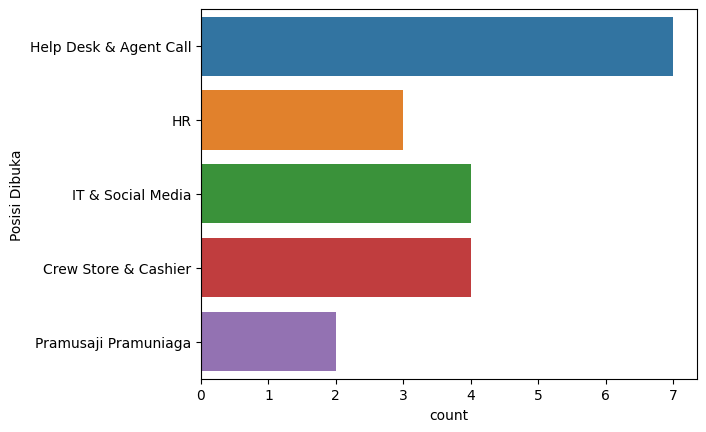

In [ ]:
sns.countplot(data=lowongan_kerja, y='Posisi Dibuka')
d.set_title("Jenis lowongan pekerjaan yang selama ini banyak diposting di Difalink", fontsize = 14)

### 6. Jenis perusahaan yang selama ini bekerjasama secara aktif bersama difalink

In [ ]:
pelamar_loker_2.head()

,Timestamp,Pernah Mengisi Form Difalink,Nama Lengkap,Jenis Kelamin,Umur,No. HP,Alamat Lengkap,Kabupaten/Kota,Provinsi,Jenis Disabilitas,Perusahaan Dilamar,Cabang Perusahaan,Posisi Dilamar,Ijazah PDF,CV PDF,Cabang Perusahaan.1,Posisi Dilamar.1,CV PDF.1,Ijazah PDF.1,Cabang Perusahaan.2,Posisi Dilamar.2,CV PDF.2,Cabang Perusahaan.3,Posisi Dilamar.3,CV PDF.3,Ijazah PDF.2,Unnamed: 26,Unnamed: 27,Pendidikan Terakhir,Tanggal Lahir,Pengalaman Kerja,Email,Ijazah PDF.3,CV PDF.4,Posisi Dilamar.4,Posisi Dilamar.5,Ijazah PDF.4,CV PDF.5,Portfolio PDF,CV PDF.6,Ijazah PDF.5,Posisi Magang Dilamar,CV PDF.7,Posisi Dilamar.6,Ijazah PDF.6,Sertifikat Booster,Bersedia Kerja Shifting,CV PDF.8,Ijazah PDF.7,Posisi Dilamar.7,Keterangan
0,2022-05-13 20:49:37.891,Sudah,Mochamad Kharis Suryadipura,Laki-laki,27.0,089636107480,"Perum mangkalaya rt06rw02, desa cibolang, keca...",Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Public Relation Officer,https://drive.google.com/open?id=1WsLLte9L8a0r...,https://drive.google.com/open?id=1kon3eEQ6shq1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-13 20:53:47.177,Sudah,Mochamad Kharis Suryadipura,Laki-laki,27.0,089636107480,"perum mangkalaya rt06rw02, desa cibolang, keca...",Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Accounting Officer,https://drive.google.com/open?id=1a8dNUc9QGpnA...,https://drive.google.com/open?id=11dlllFm5BIxh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-13 20:55:03.526,Sudah,Adi Prabowo,Laki-laki,24.0,085880077082,Jl.tegalan 1.B No.34 Kel.Palmeriam Kec.Matrama...,Jakarta Timur,DKI Jakarta,Disabilitas Fisik,ALFAMART,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BEKASI,Crew Store,https://drive.google.com/open?id=1XkkKVOHKNaFE...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-13 20:56:50.741,Sudah,Mochamad KharisSuryadipura,Laki-laki,27.0,089636107480,"perum mangkalaya rt06rw02, desa cibolang kecam...",Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Public Relation Officer,https://drive.google.com/open?id=1GmQtXmsKzWX1...,https://drive.google.com/open?id=1wFJy0b7rCEpW...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-14 20:21:25.843,Sudah,Nurlaila Selo Rahmawati,Perempuan,26.0,+6289635553395,"Kerjo RT.02 RW.02 Sumberejo, Kec. Kerjo. Kab....",Kab. Karanganyar,Jawa Tengah,Tuli,PT. Berdikari,Jakarta Pusat,Accounting Officer,https://drive.google.com/open?id=1CeWQmNTZuYyn...,https://drive.google.com/open?id=1THH9AXmt1KLe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(pelamar_loker_2['Perusahaan Dilamar'].unique()) #data pelamar yang melamar di perusahaan via difalink
len(pelamar_loker_2['Perusahaan Dilamar'].unique())

['PT. Berdikari' 'ALFAMART' 'PT. INFOMEDIA NUSANTARA' 'BPAKR' 'BCA'
 'PT. Borwita Citra Prima' 'PT Mitracomm Ekasarana Semarang'
 'PT. Sumber Alfaria Trijaya, tbk' 'Reckitt Indonesia'
 'Matahari Department Store' 'PT. Klik Eat Indonesia' 'ALFAMIDI']


12

In [ ]:
print(lowongan_kerja['Nama Perusahaan'].unique())
len(lowongan_kerja['Nama Perusahaan'].unique())

['PT Infomedia Nusantara' 'United Nations Volunteers Programme (UNV)'
 'Persolkelly' 'PT. Aneka Petroindo Raya' 'PT Berdikari'
 'Mitracomm Ekasarana' 'PT Borwita Citra Prima cabang Yogya'
 'PT Mitracomm Ekasarana Semarang' 'PT. Sumber Alfaria Trijaya, tbk'
 'Reckitt Indonesia' 'PT. Infomedia Nusantara by Telkom'
 'Matahari Department Store' 'PT. Klik Eat Indonesia'
 'PT. Midi Utama Indonesia Tbk'
 'PT.Midi Utama Indonesia Tbk. (Branch Pasuruan)' 'Supri Van Java Film']


16

In [ ]:
from pandas.core.algorithms import value_counts
pelamar_loker_2['Perusahaan Dilamar'].value_counts()

ALFAMART                           217
Reckitt Indonesia                  105
PT. Berdikari                       58
PT. Sumber Alfaria Trijaya, tbk     45
PT. INFOMEDIA NUSANTARA             38
BCA                                 23
PT. Klik Eat Indonesia              23
PT. Borwita Citra Prima             15
Matahari Department Store           12
PT Mitracomm Ekasarana Semarang      7
ALFAMIDI                             3
BPAKR                                1
Name: Perusahaan Dilamar, dtype: int64

In [ ]:
a = pelamar_loker_2['Posisi Dilamar'].value_counts()
b = pelamar_loker_2['Posisi Dilamar.1'].value_counts()
c = pelamar_loker_2['Posisi Dilamar.2'].value_counts()
d = pelamar_loker_2['Posisi Dilamar.3'].value_counts()
e = pelamar_loker_2['Posisi Dilamar.4'].value_counts()
f = pelamar_loker_2['Posisi Dilamar.5'].value_counts()
g = pelamar_loker_2['Posisi Dilamar.6'].value_counts()
h = pelamar_loker_2['Posisi Dilamar.7'].value_counts()
i = pelamar_loker_2['Posisi Magang Dilamar'].value_counts()

print(f'{a}\n')
print(f'{b}\n')
print(f'{c}\n')
print(f'{d}\n')
print(f'{e}\n')
print(f'{f}\n')
print(f'{g}\n')
print(f'{h}\n')
print(i)

Cashier                    34
Public Relation Officer    15
Accounting Officer          9
Crew Store                  3
Name: Posisi Dilamar, dtype: int64

Agent Call Center    38
Name: Posisi Dilamar.1, dtype: int64

Crew Store    122
Helper         95
Name: Posisi Dilamar.2, dtype: int64

Administrasi          23
Petugas Pom Bensin     1
Name: Posisi Dilamar.3, dtype: int64

Telesales    15
Name: Posisi Dilamar.4, dtype: int64

Social Media Officer    26
Recruitment Officer     19
Name: Posisi Dilamar.5, dtype: int64

Pramuniaga    12
Name: Posisi Dilamar.6, dtype: int64

Barista/Pramusaji    23
Name: Posisi Dilamar.7, dtype: int64

Human Resources (HR)    52
Marketing               34
Komunikasi              33
Name: Posisi Magang Dilamar, dtype: int64
